<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='40%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./318_fire_indonesia_2020.ipynb"><< 318 Indonesian Fires 2020 - Multi-data</a><span style="float:right;"><a href="./321_air_pollution_map_time-series_Metop-AB_GOME-2_NO2Tropo_L3.ipynb">321 - Map and time-series of Metop-A/B GOME-2 Tropospheric NO<sub>2</sub> Level 3 >></a></span>

<div class="alert alert-block alert-warning">
<b>30 - CASE STUDIES - FIRE</b></div>

<div class="alert alert-block alert-warning">

<b>PREREQUISITES </b>

The following **20 - DATA DISCOVERY** module is a prerequisite:   
- [232 - Metop-AB IASI - Carbon Monoxide - Level 2](../20_data_discovery/232_Metop-AB_IASI_CO_L2_load_browse.ipynb)
- [241 - Sentinel-5P TROPOMI - Carbon Monoxide - Level 2](../20_data_discovery/241_Sentinel-5P_TROPOMI_CO_L2_load_browse.ipynb)
- [242 - Sentinel-5P TROPOMI - UV Aerosol Index - Level 2](../20_data_discovery/242_Sentinel-5P_TROPOMI_UVAI_L2_load_browse.ipynb)
- [251 - Sentinel-3 OLCI - Radiance - Level 1B](../20_data_discovery/251_Sentinel-3_OLCI_radiance_L1_load_browse.ipynb)
- [252 - Sentinel-3 SLSTR - Fire Radiative Power - Level 2](../20_data_discovery/252_Sentinel-3_SLSTR_NRT_FRP_L2_load_browse.ipynb)   
- [262 - CAMS Global Fire Assimilation System - Wildfire Radiative Power](../20_data_discovery/262_CAMS_GFAS_FRPFIRE_load_browse.ipynb) 
- [271 - CEMS Global ECMWF Fire Forecasts - Fire Weather Index](../20_data_discovery/271_CEMS_GEFF_FWI_load_browse.ipynb)
- [272 - CEMS Global ECMWF Fire Forecasts - Fire Weather Index Harmonized Danger Classes](../20_data_discovery/272_CEMS_GEFF_FWI_harmonized_danger_classes.ipynb)  


It is recommended to go through the module before you start with this module.
</div>

<hr>

# 3.1.9 Discover Portugal Fires 2020

In July 2020, Portugal experienced high temperatures and strong winds, leading to rapidly spreading wildfires in its central region. A state of alert was declared, which banned lighting of fires and restricted forest access. 850 firefighters were mobilized to contain the blazes and one of these firefighters died on duty, as reported by [Reuters](https://www.usnews.com/news/world/articles/2020-07-26/hundreds-of-firefighters-battle-central-portugal-blaze). 

Read more about the Portugal fires [here](https://www.dw.com/en/portugal-wildfires-state-of-alert/a-54329910).

The dynamics and extent of the fires were monitored by different sensors and data. This notebook covers the following data products:
<a id="top"></a>
- [Sentinel-3 OLCI - RGB](#sentinel3_olci)
- [CAMS GFAS - Wildfire Radiative Power](#cams_gfas)
- [Sentinel-3 SLSTR - Near-Real-Time Fire Radiative Power (FRP)](#sentinel3_slstr)
- [CEMS GEFF - FWI - Harmonized danger classes](#cems_geff)
- [Metop-A/B/C IASI - Total Column Carbon Monoxide (CO) - Level 2](#iasi_co)
- [Sentinel-5P TROPOMI - Carbon Monoxide (CO) - Level 2](#sentinel_5p_co)
- [Sentinel-5P TROPOMI - Ultraviolet Aerosol Index (UVAI) - Level 2](#sentinel_5p_uvai)


<br>

<img src='../img/portugalfires_1_DW.jpg' alt='Portugal Fires, source: https://www.dw.com/en/portugal-wildfires-state-of-alert/a-54329910#' align='centre' width='60%'></img>

<i>Caption: Villagers gather to see the evolution of the fire in Isna village.</i> Image from [DW.com](https://www.dw.com/en/portugal-wildfires-state-of-alert/a-54329910).

<hr>

#### Load required libraries

In [48]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from skimage import exposure

from netCDF4 import Dataset
import pandas as pd

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Helper functions

In [49]:
%run ../functions.ipynb

<hr>

## <a id='sentinel3_olci'></a>Sentinel-3 OLCI Level 1 RGB

Sentinel-3 OLCI Level 1 RGB composites can highlight areas of smoke resulting from wildfires. Let's go through step by step to load Sentinel-3 OLCI Level 1 data and to build a RGB false color composite.

#### Load OLCI channel information into one xarray object with xarray's function `open_mfdataset`

You can load mulitple files at once with `open_mfdataset`. In the case of Sentinel-3 OLCI Level-1 data, you want to combine the data of all 21 channels into one xarray object. The structure of the single data files is equal, thus you can combine the data by coordinates by using the keyword argument `by_coords`.

In [5]:
olci_dir = '../eodata/sentinel3/olci/2020/07/26/S3A_OL_1_EFR____20200726T104604_20200726T104904_20200727T145020_0179_061_051_2340_LN1_O_NT_002/'


In [6]:
olci_xr_mf = xr.open_mfdataset(olci_dir+'*_radiance.nc', combine='by_coords')
olci_xr_mf

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4090)
Dimensions without coordinates: columns, rows
Data variables:
    Oa01_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa02_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa03_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa04_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa05_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa06_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa07_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa08_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa09_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa10_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa11_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa12_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa13_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa14_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa15_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa16_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa17_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa18_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa19_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa20_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa21_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
Attributes:
    absolute_orbit_number:  23124
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2020-07-27T14:50:20Z
    history:                  2020-07-27T14:50:20Z: PUGCoreProcessor /data/ip...
    institution:            LN1
    netCDF_version:         4.2 of Mar 13 2018 10:14:33 $
    product_name:           S3A_OL_1_EFR____20200726T104604_20200726T104904_2...
    references:             S3IPF PDS 004.1 - i2r2 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.08
    start_time:             2020-07-26T10:46:03.838332Z
    stop_time:              2020-07-26T10:49:03.759313Z
    title:                  OLCI Level 1b Product, Radiance Oa01 Data Set

#### Load the geo-coordinates and retrieve the data for `latitude` and `longitude`

You might want to georeference the resulting RGB image. Thus, you can already load the `geo_coordinates.nc` file and retrieve `latitude` and `longitude` information.

In [7]:
olci_geo_coords = xr.open_dataset(olci_dir+'geo_coordinates.nc')

lat = olci_geo_coords.latitude.data
lon = olci_geo_coords.longitude.data

<br>

#### Select the channels for the RGB composite

The function [select_channels_for_rgb](./ltpy_functions.ipynb#rgb_channels) selects the chosen channels from the loaded xarray object. In this case, we select the channels #17, #05 and #02. Those channels allow to build a false color composite that highlights healthy vegetation in red and also shows the fire smokes more prominently.

In [8]:
red, green, blue = select_channels_for_rgb(olci_xr_mf, 'Oa17_radiance', 'Oa05_radiance', 'Oa02_radiance')


#### Normalize the channels `red`, `green` and `blue`

The function [normalize](./ltpy_functions.ipynb#normalize) normalizes the data values within a range between 0 and 1.

In [9]:
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

#### Stack the RGB channels into a multi-dimensional array with `np.dstack`

In [11]:
rgb = np.dstack((redn, greenn, bluen))

#### Apply a histogram equalization 

A histogram equalization can improve the contrast of the resulting RGB composite. Thus, we use the `exposure` function from the ski-kit-learn library to equalize the image based on the data's histogram.

In [12]:
rgb = exposure.equalize_adapthist(rgb)

#### Map the rgb values onto a color array

If you want to visualize a georeferenced RGB image, you have to map the rgb values onto a color array with the following code:

In [13]:
mesh_rgb = rgb[:, :-1, :]
colorTuple = mesh_rgb.reshape((mesh_rgb.shape[0] * mesh_rgb.shape[1]), 3)
colorTuple = np.insert(colorTuple, 3, 1.0, axis=1)

#### Visualize the final RGB false color composite with the function `visualize_s3_pcolormesh`

Let's visualize the color array in a georeferenced way with matplotlib's function `pcolormesh`.

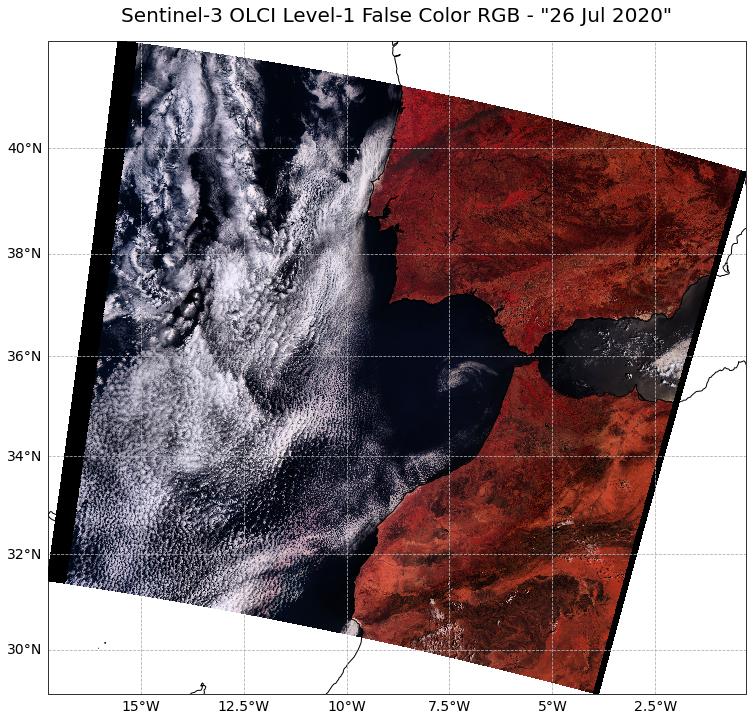

In [14]:
visualize_s3_pcolormesh(colorTuple, 
                        red, lat, lon, 
                        'Sentinel-3 OLCI Level-1 False Color RGB - "26 Jul 2020"')

^ [Return to the top](#top)

<br>

## <a id="cams_gfas"></a>CAMS GFAS - Wildfire Radiative Power

The [CAMS Global Fire Assimilation System (GFAS)](https://atmosphere.copernicus.eu/global-fire-emissions) assimilates fire radiative power (FRP) observations from satellite-based sensors to produce daily estimates of wildfire and biomass burning emissions. 

### Open a CAMS GFAS netCDF file with `xarray`

Load the CAMS GFAS fire emission data with `open_dataset` function from `xarray`. The xarray dataset contains a data variable called `frpfire`.

In [15]:
gfas_frpfire_xr = xr.open_dataset('../eodata/cams/gfas/2020/07/20200701-31_gfas_wildfire_radiative_power.nc')
gfas_frpfire_xr

<xarray.Dataset>
Dimensions:    (latitude: 1800, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2020-07-01 2020-07-02 ... 2020-07-31
Data variables:
    frpfire    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-14 09:54:08 GMT by grib_to_netcdf-2.21.0: grib_to_n...

### <a id='shift_europe'></a>Bring longitude coordinates onto a [-180,180] grid

Use the `assign_coords()` function to assign new values to the coordinates of the `xarray.Dataset` and bring them onto a [-180,180] grid.

In [16]:
gfas_frpfire_xr_assigned = gfas_frpfire_xr.assign_coords(longitude=(((gfas_frpfire_xr.longitude + 180) % 360) - 180)).sortby('longitude')
gfas_frpfire_xr_assigned

<xarray.Dataset>
Dimensions:    (latitude: 1800, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2020-07-01 2020-07-02 ... 2020-07-31
Data variables:
    frpfire    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-14 09:54:08 GMT by grib_to_netcdf-2.21.0: grib_to_n...

Select the data variable `frpfire`.

In [17]:
frpfire = gfas_frpfire_xr_assigned['frpfire']
frpfire

<xarray.DataArray 'frpfire' (time: 31, latitude: 1800, longitude: 3600)>
[200880000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2020-07-01 2020-07-02 ... 2020-07-31
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

### <a id='subset'></a>Create a geographical subset for Portugal.

Subset the data to Spain and Portugal using the function [generate_geographical_subset](./functions.ipynb#generate_geographical_subset) and by specifying a bounding box using the coordinates of the extent. 

In [18]:
latmin = 35.5
latmax = 44.
lonmin = -11.
lonmax = -5

frpfire_subset = generate_geographical_subset(xarray=frpfire, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
frpfire_subset

<xarray.DataArray 'frpfire' (time: 31, latitude: 85, longitude: 60)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -10.95 -10.85 -10.75 ... -5.25 -5.15 -5.05
  * latitude   (latitude) float32 43.95 43.85 43.75 43.65 ... 35.75 35.65 35.55
  * time       (time) datetime64[ns] 2020-07-01 2020-07-02 ... 2020-07-31
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

### Visualize CAMS GFAS fire emissions data

You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to visualize the CAMS global fire emissions data with matplotlib's function `pcolormesh`. 

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Wildfire radiative power 2020-07-26T00:00:00.000000000'}>)

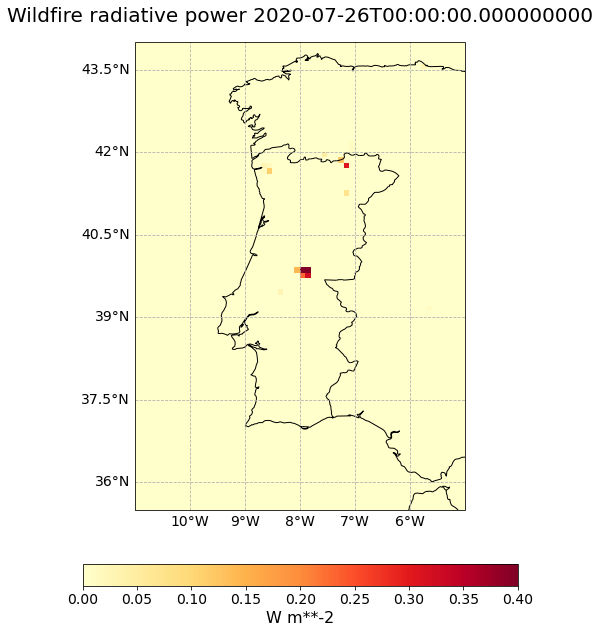

In [19]:
visualize_pcolormesh(data_array=frpfire_subset.isel(time=25).data,
                     longitude=frpfire_subset.longitude.data,
                     latitude=frpfire_subset.latitude.data,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlOrRd',
                     unit=frpfire_subset.units,
                     long_name=frpfire_subset.long_name + ' ' + str(frpfire_subset.isel(time=25).time.data),
                     vmin=0, 
                     vmax=0.4,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

^ [Return to the top](#top)

<br>

## <a id="sentinel3_slstr"></a> Sentinel-3 SLSTR Near-Real-Time Fire Radiative Power (FRP)

The [Copernicus Near-Real-Time Sentinel 3 Fire Radiative Power](https://navigator.eumetsat.int/product/EO:EUM:DAT:0207) product identifies the location, and quantifies the radiative power, of any hotspot present on land and ocean Earth surfaces, that radiates a heating signal within a pixel size of 1 km2.

#### Load `SLSTR FRP` data with xarray's `open_dataset()` function

Load the Sentinel-3 SLSTR FRP data file with `xarray`'s `open_dataset` function.


There are three variables of interest:
- `FRP_MWIR` - Fire Radiative Power computed from MWIR channel (3.7 um) [MW] --> fires with temperatures < 1100 Kelvin
- `FRP_SWIR` - Fire Radiative Power computed from SWIR channel (2.25 um) [MW] --> fires with temperatures > 1100 Kelvin
- `FLAG_SWIR_SAA` - Flag values to filter out South Atlantic ANomalies (SAA) & other transient / spurious events, only applicable to FRP SWIR

In [33]:
frp_dir = '../eodata/sentinel3/slstr/2020/07/25/'
frp_xr = xr.open_dataset(frp_dir+'FRP_3b_in.nc')
frp_xr

<xarray.Dataset>
Dimensions:                 (columns: 1500, fires: 429, rows: 2000)
Dimensions without coordinates: columns, fires, rows
Data variables:
    i                       (fires) int16 ...
    j                       (fires) int32 ...
    time                    (fires) datetime64[ns] ...
    latitude                (fires) float64 ...
    longitude               (fires) float64 ...
    FRP_MWIR                (fires) float64 ...
    FRP_uncertainty_MWIR    (fires) float64 ...
    transmittance_MWIR      (fires) float64 ...
    FRP_SWIR                (fires) float64 ...
    FRP_uncertainty_SWIR    (fires) float64 ...
    FLAG_SWIR_SAA           (fires) int16 ...
    transmittance_SWIR      (fires) float64 ...
    confidence              (fires) float64 ...
    classification          (fires) uint8 ...
    S7_Fire_pixel_radiance  (fires) float32 ...
    F1_Fire_pixel_radiance  (fires) float32 ...
    used_channel            (fires) uint8 ...
    Radiance_window         (fires) float32 ...
    Glint_angle             (fires) float64 ...
    IFOV_area               (fires) float64 ...
    TCWV                    (fires) float64 ...
    n_window                (fires) int16 ...
    n_water                 (fires) int16 ...
    n_cloud                 (fires) int16 ...
    n_SWIR_fire             (fires) float32 ...
    flags                   (rows, columns) uint32 ...
Attributes:
    title:                  SLSTR Level 2 Product, Fire Radiative Power measu...
    comment:                 
    netCDF_version:         4.2 of Jul  5 2012 17:07:43 $
    product_name:           S3B_SL_2_FRP____20200725T214818_20200725T215318_2...
    institution:            MAR
    source:                 IPF-SL-2-FRP 02.00
    history:                 
    references:             S3MPC ACR FRP 003 - i1r2 - SLSTR L2 Product Data ...
    contact:                ops@eumetsat.int
    creation_time:          2020-07-26T00:21:38Z
    resolution:             [ 1000 1000 ]
    absolute_orbit_number:  11723
    start_time:             2020-07-25T21:48:17.819223Z
    stop_time:              2020-07-25T21:53:17.808307Z
    track_offset:           998
    start_offset:           3109

<br>

#### Load `latitude` and `longitude` information

You can already load the `latitude` and `longitude` information, which will be required for the regridding process.

In [34]:
lat_frp = frp_xr['latitude']
lat_frp

lon_frp = frp_xr['longitude']
lon_frp

<xarray.DataArray 'longitude' (fires: 429)>
array([-5.21162 , -4.958087, -4.352265, ..., -2.915329, -2.925332, -2.947486])
Dimensions without coordinates: fires
Attributes:
    long_name:      Longitude
    standard_name:  longitude
    units:          degrees_east
    valid_min:      -180.0
    valid_max:      180.0

<br>

#### Define variables for `plotting` and `gridding`

Let us also define some variables for `plotting` and the `gridding` process. For example the sampling size of the gridded FRP values or the geographical extent.

In [22]:
sampling_lat_FRP_grid = 0.15        # Sampling for gridded FRP values & differenrce  stats computation 
sampling_lon_FRP_grid = 0.15        # Sampling for gridded FRP values & differenrce  stats computation 
FRP_plot_max_grid     = 40.         # Max Integrated FRP value, for plots


lat_min               = 35.5        # Minimum latitude for mapping plot [deg N]
lat_max               = 44.        # Maximum latitude for mapping plot [deg N]
lon_min               = -11.        # Minimum lonitude for mapping plot [deg E]
lon_max               = -5.        # Maximum lonitude for mapping plot [deg E]

Now, let us go through the three different variables (`MWIR`, `SWIR` and `SWIR with SAA filtered out`) and let us load, mask, regrid and visualize them.

<br>

## <a id='load_mwir'></a>Load, mask and regrid `FRP computed from MWIR channel (3.7 um)`

The first step is to load the `FRP_MWIR` data variable from the loaded `netCDF` file.

In [23]:
frp_mwir = frp_xr['FRP_MWIR']
frp_mwir

<xarray.DataArray 'FRP_MWIR' (fires: 429)>
array([14.649502, 11.180686, 12.538479, ...,  2.165554,  1.377944,  3.029317])
Dimensions without coordinates: fires
Attributes:
    long_name:  Fire radiative power computed from MWIR channels (S7 and F1)
    units:      MW

Next, use the function [generate_masked_array](./functions.ipynb#generate_masked_array) to extract the valid pixels. Valid pixels are different to -1. 

In [24]:
masked_frp_mwir = generate_masked_array(frp_mwir, frp_mwir, -1.,operator='!=', drop=True)
masked_frp_mwir


<xarray.DataArray 'FRP_MWIR' (fires: 389)>
array([1.46495019e+01, 1.11806856e+01, 1.25384788e+01, 1.22277098e+01,
       1.21867129e+01, 1.45304002e+01, 1.45336300e+01, 5.13395992e+00,
       1.82057425e+01, 1.24073083e+01, 1.19115763e+01, 1.62011408e+01,
       1.22905227e+01, 1.40449398e+01, 1.14416781e+01, 8.29657703e+00,
       1.43244168e+01, 1.25964245e+01, 1.25964245e+01, 1.18847369e+01,
       9.80782649e+00, 1.21900976e+01, 1.34344298e+01, 1.45343539e+01,
       2.57714382e+01, 2.51056931e+01, 1.25011844e+01, 1.26549377e+01,
       3.17003736e+01, 9.76884901e+00, 2.46930755e+01, 3.10587591e+01,
       2.55043100e+01, 1.32673972e+01, 1.01260628e+01, 3.70907928e+01,
       1.03955716e+01, 2.15844698e+01, 2.79927474e+01, 9.50849129e+00,
       1.08637002e+01, 1.49323798e+01, 1.73938150e+01, 1.10870434e+01,
       1.01434319e+01, 1.04358093e+01, 1.71884659e+01, 1.85588728e+01,
       1.87688468e+01, 1.90556540e+01, 1.99878069e+01, 2.43185582e+01,
       6.59404797e+00, 6.22173193e+00, 7.17832738e+00, 6.31282840e+00,
       1.39043150e+01, 6.34767899e+00, 1.02200595e+01, 1.25452133e+01,
       1.78018731e+01, 2.80508479e+01, 4.08449415e+00, 4.40912301e+00,
       4.48273126e+00, 4.21414978e+00, 1.73196423e+00, 9.98046633e+01,
       3.12506873e+01, 1.04475663e+01, 8.07374904e+00, 6.93146059e+01,
       6.93535173e+01, 9.82688568e+00, 1.93591255e+00, 2.29418845e+00,
       6.67762793e+02, 5.35921477e+02, 1.44457277e+02, 6.46997395e+01,
...
       6.07713391e+00, 3.94234913e+00, 3.58179259e+00, 7.55678790e+00,
       7.30785891e+00, 4.90235882e+00, 8.12728226e+00, 6.66974373e+00,
       6.94792514e+00, 8.37497637e+00, 7.57172964e+00, 3.16480909e+00,
       4.96607402e+00, 6.94827282e+00, 4.48370596e+00, 4.01466494e+00,
       3.48447774e+00, 3.88434254e+00, 3.01770714e+00, 2.89751348e+00,
       4.92016351e+00, 6.59998204e+00, 6.71967994e+00, 6.25359140e+00,
       1.07218448e+01, 5.43588726e+00, 5.69266137e+00, 1.78620190e+00,
       1.95399677e+00, 2.39298761e+00, 4.35282594e+00, 1.66746549e+00,
       1.19259719e+00, 1.73664333e+00, 5.77818664e+00, 5.91517078e+00,
       7.93891396e+00, 4.15237991e+00, 1.98832823e+00, 3.61222697e+00,
       4.61971153e+00, 4.03111317e+00, 2.94496886e+00, 2.36106570e+00,
       5.42352335e+00, 1.82621676e+00, 8.27835231e+00, 7.99779965e+00,
       4.87195031e+00, 1.92157341e+00, 8.55960278e+00, 7.85912248e+00,
       3.82270714e+00, 6.93744740e+00, 4.62387794e+00, 4.28525564e+00,
       2.85237852e+00, 2.52759728e+00, 1.80228654e+00, 1.40833483e+00,
       2.22172109e+00, 2.41393839e+00, 2.78807542e+00, 9.11904042e+00,
       9.10471782e+00, 5.66432630e+00, 4.01601597e+00, 4.49971741e+00,
       4.01565616e+00, 2.72933341e+00, 2.87028746e+00, 7.27071377e+00,
       6.63191530e+00, 2.57912756e+00, 2.16555355e+00, 1.37794360e+00,
       3.02931713e+00])
Dimensions without coordinates: fires
Attributes:
    long_name:  Fire radiative power computed from MWIR channels (S7 and F1)
    units:      MW

Let us retrieve the number of of hotspots / fires in total and per category.

In [25]:
n_fire_tot           = len(lat_frp[:])
n_fire_MWIR          = len(masked_frp_mwir.to_masked_array().compressed())

n_fire_tot, n_fire_MWIR

(429, 389)

### Generate a gridded FRP array

Let us compute the gridded FRP information by applying function [slstr_frp_gridding](./functions.ipynb#slstr_frp_gridding) to the `frp_mwir` data array.

In [26]:
FRP_MWIR_grid, lat_grid, lon_grid = slstr_frp_gridding(parameter_array = frp_mwir, 
                                                       parameter = 'mwir', 
                                                       lat_min = lat_min, 
                                                       lat_max = lat_max, 
                                                       lon_min = lon_min, 
                                                       lon_max = lon_max, 
                                                       sampling_lat_FRP_grid = sampling_lat_FRP_grid,
                                                       sampling_lon_FRP_grid = sampling_lon_FRP_grid,
                                                       lat_frp = lat_frp,
                                                       lon_frp = lon_frp,
                                                       n_fire = n_fire_MWIR)
FRP_MWIR_grid, lat_grid, lon_grid

(array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
       dtype=float32),
 array([[35.575, 35.575, 35.575, ..., 35.575, 35.575, 35.575],
        [35.725, 35.725, 35.725, ..., 35.725, 35.725, 35.725],
        [35.875, 35.875, 35.875, ..., 35.875, 35.875, 35.875],
        ...,
        [43.675, 43.675, 43.675, ..., 43.675, 43.675, 43.675],
        [43.825, 43.825, 43.825, ..., 43.825, 43.825, 43.825],
        [43.975, 43.975, 43.975, ..., 43.975, 43.975, 43.975]],
       dtype=float32),
 array([[-10.925, -10.775, -10.625, ...,  -5.225,  -5.075,  -4.925],
        [-10.925, -10.775, -10.625, ...,  -5.225,  -5.075,  -4.925],
        [-10.925, -10.775, -10.6

<br>

Mask out the invalid pixels for plotting. You can used numpy's function `np.ma.masked_array()` for this.

In [27]:
mask_valid = np.where(FRP_MWIR_grid[:,:] != -9999., False, True)
D_mwir          = np.ma.masked_array(FRP_MWIR_grid[:,:], mask=mask_valid)
D_mwir

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

<br>

Calculate some statistics and add them to a string that can be integrated in the final plot.

In [28]:
textstr_1 = 'Total number 1km hot-spots = ' + str(n_fire_MWIR)


FRP_sum      = np.sum(masked_frp_mwir.to_masked_array().compressed())
FRP_mean     = np.mean(masked_frp_mwir.to_masked_array().compressed())
FRP_std      = np.std(masked_frp_mwir.to_masked_array().compressed())
FRP_min      = np.min(masked_frp_mwir.to_masked_array().compressed())
FRP_max      = np.max(masked_frp_mwir.to_masked_array().compressed())

FRP_sum_str  = '%.1f' % FRP_sum
FRP_mean_str = '%.1f' % FRP_mean
FRP_std_str  = '%.1f' % FRP_std
FRP_min_str  = '%.1f' % FRP_min
FRP_max_str  = '%.1f' % FRP_max

textstr_2 = 'FRP 1 km: \n Total = '+FRP_sum_str+' [MW] \n Avg. = '+ FRP_mean_str + ' [MW] \n Min = ' + FRP_min_str + ' [MW] \n Max = ' + FRP_max_str + ' [MW]'



<br>

### Visualize the masked data array with matplotlib's `pcolormesh()` function

Use the function [visualize_s3_frp](./functions.ipynb#visualize_s3_frp) to plot the  plot the `FRP computed from MWIR channel` data. Additionally, you can take information such as `longname` or `units` from the data variable attributes.

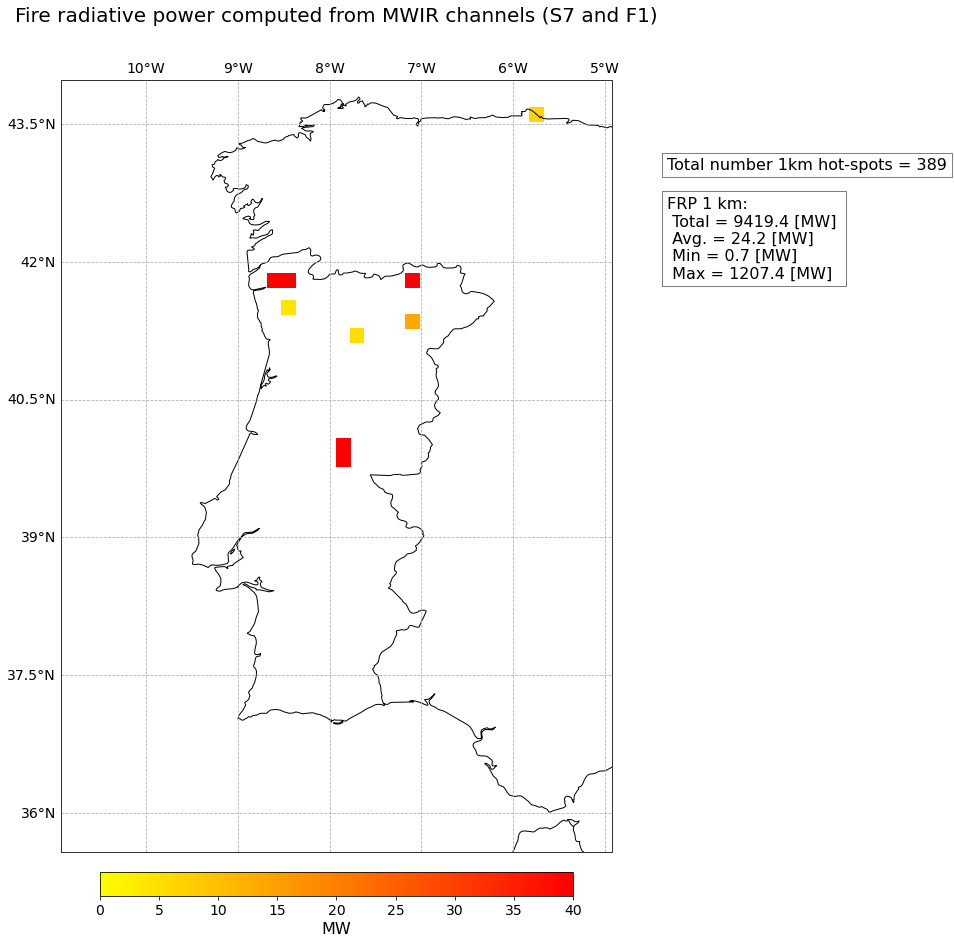

In [29]:
long_name = frp_mwir.long_name
unit = frp_mwir.units
vmax = FRP_plot_max_grid

visualize_s3_frp(data = D_mwir[:,:],
                 lat = lat_grid, 
                 lon = lon_grid, 
                 unit = unit, 
                 longname = long_name, 
                 textstr_1 = textstr_1, 
                 textstr_2 = textstr_2, 
                 vmax = FRP_plot_max_grid)

<br>

^ [Return to the top](#top)

<br>

## <a id="cems_geff"></a> CEMS GEFF FWI - Harmonized danger classes

According to EFFIS [documentation and user guidelines](https://effis.jrc.ec.europa.eu/about-effis/technical-background/fire-danger-forecast/):

- In most European countries, the core of the wildfire season starts on 1st of March and ends on 31st of October.
- The EFFIS network adopts the Canadian Forest Fire Weather Index (FWI) System as the method to assess the fire danger level in a harmonized way throughout Europe.
  
**European** Fire Danger Classes (FWI ranges, upper bound excluded):
  - Very low = 0 - 5.2
  - Low = 5.2 - 11.2 
  - Moderate = 11.2 - 21.3 
  - High = 21.3 - 38.0 
  - Very high = 38.0 - 50.0 
  - Extreme > 50.0

In ECMWF experience, the above thresholds are particularly suited to assess fire danger in southern Europe, e.g. in the Mediterranean Region. Some countries, tend to calibrate these thresholds depending on local vegetation characteristics and fire regimes. This require local knowledge and/or experimentation.
For instance, **Portugal** uses the following thresholds for local-level assessments of fire danger: 
  - Reduced risk = 8.4,
  - Moderate risk = 17.2,
  - High risk = 24.6,
  - Maximum risk = 38.3

## Classified forecasts

Raw FWI forecast values are expressed as a continuous rating in the range [0, +Inf[ (very rarely above 100). In order to aid decision makers raw forecasts are routinely converted into danger classes, based on the thresholds mentioned above, before being displayed by the EFFIS/GWIS viewer.

In this tutorial we are going to look at the predictive capability of the fire danger forecasts. Let us use the forecast issued on 16th July to see whether dangerous fire weather could have been predicted in the area where the fires started burning on 25th July (leadtime = 10 days).

#### Open and plot the raw RT HRES forecast for Portugal, issued on 16th July 2020 (10 days before the fires)

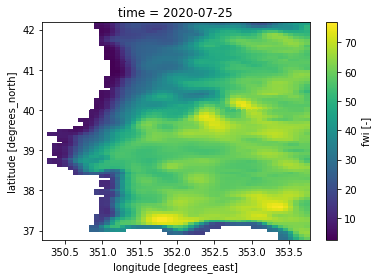

In [30]:
ds = xr.open_dataset("../eodata/geff/portugal/rt_hr/ECMWF_FWI_20200716_1200_hr.nc")

# Plot the raw forecast, Day 10
ds.fwi[9].plot();

Let's use the EFFIS thresholds

#### Plot the re-classified forecast, Day 10

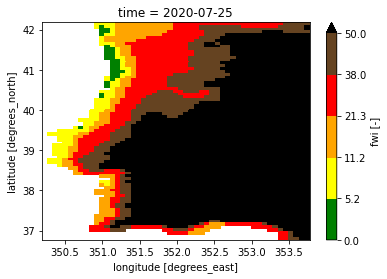

In [31]:
ds.fwi[9].plot(levels = [0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
               colors = ["#008000", "#FFFF00", "#FFA500", "#FF0000", "#654321", "#000000"],
               label = ['Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extreme']);

#### Highlight only cells above Very High Danger

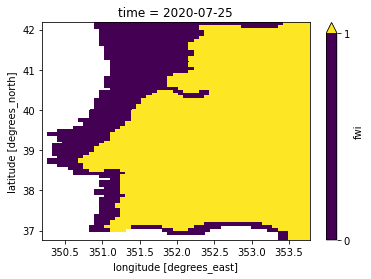

In [32]:
ds_vh = xr.where(cond = ds < 38.0, x = 0, y = ds)
ds_vh.fwi[9].plot(levels = [0, 1]);

^ [Return to the top](#top)

<br>

## <a id="iasi_co"></a> Metop-A/B/C IASI - Total Column Carbon Monoxide (CO) - Level 2

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/website/home/Satellites/CurrentSatellites/Metop/MetopDesign/IASI/index.html) is an intstrument onboard the Metop-A/B/C satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

Use`xarray`'s function `open_dataset` to load the IASI data files for each of Metop-A/B/C.

#### <a id='step1'></a>Load the Metop-A IASI Level 2 data

In [51]:
file_name_2a = '../eodata/iasi/nc/2a/2020/07/26/IASI_METOPA_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc'
file_2a = xr.open_dataset(file_name_2a)
file_2a

<xarray.Dataset>
Dimensions:                            (nlayers: 19, npressures: 20, time: 542339)
Coordinates:
  * time                               (time) float64 4.281e+08 ... 4.282e+08
Dimensions without coordinates: nlayers, npressures
Data variables:
    time_string                        (time) |S16 ...
    time_in_day                        (time) float64 ...
    latitude                           (time) float32 ...
    longitude                          (time) float32 ...
    solar_zenith_angle                 (time) float32 ...
    satellite_zenith_angle             (time) float32 ...
    orbit_number                       (time) int64 ...
    scanline_number                    (time) int32 ...
    pixel_number                       (time) int32 ...
    ifov_number                        (time) int32 ...
    retrieval_quality_flag             (time) int32 ...
    surface_altitude                   (time) float32 ...
    CO_apriori_partial_column_profile  (time, nlayers) float32 ...
    CO_partial_column_profile          (time, nlayers) float32 ...
    CO_partial_column_error            (time, nlayers) float32 ...
    CO_total_column                    (time) float32 ...
    CO_total_column_error              (time) float32 ...
    CO_degrees_of_freedom              (time) float32 ...
    air_partial_column_profile         (time, nlayers) float32 ...
    atmosphere_pressure_grid           (time, npressures) float32 ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 ...
Attributes:
    title:                       IASI/METOPA ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-07-27 06:29:54 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    references:                  Reference to the CO retrieval: FORLI radiati...
    id:                          IASI_METOPA_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc
    tracking_id:                 c4b42a34-cfc1-11ea-b48e-002590598fac
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,carbon mono...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-A
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<br>

#### Load the Metop-B IASI Level 2 data

In [52]:
file_name_2b = '../eodata/iasi/nc/2b/2020/07/26/IASI_METOPB_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc'
file_2b = xr.open_dataset(file_name_2b)
file_2b

<xarray.Dataset>
Dimensions:                            (nlayers: 19, npressures: 20, time: 541593)
Coordinates:
  * time                               (time) float64 4.281e+08 ... 4.282e+08
Dimensions without coordinates: nlayers, npressures
Data variables:
    time_string                        (time) |S16 ...
    time_in_day                        (time) float64 ...
    latitude                           (time) float32 ...
    longitude                          (time) float32 ...
    solar_zenith_angle                 (time) float32 ...
    satellite_zenith_angle             (time) float32 ...
    orbit_number                       (time) int64 ...
    scanline_number                    (time) int32 ...
    pixel_number                       (time) int32 ...
    ifov_number                        (time) int32 ...
    retrieval_quality_flag             (time) int32 ...
    surface_altitude                   (time) float32 ...
    CO_apriori_partial_column_profile  (time, nlayers) float32 ...
    CO_partial_column_profile          (time, nlayers) float32 ...
    CO_partial_column_error            (time, nlayers) float32 ...
    CO_total_column                    (time) float32 ...
    CO_total_column_error              (time) float32 ...
    CO_degrees_of_freedom              (time) float32 ...
    air_partial_column_profile         (time, nlayers) float32 ...
    atmosphere_pressure_grid           (time, npressures) float32 ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 ...
Attributes:
    title:                       IASI/METOPB ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-07-27 06:31:08 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    references:                  Reference to the CO retrieval: FORLI radiati...
    id:                          IASI_METOPB_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc
    tracking_id:                 fd559e0e-cfc1-11ea-bfdd-002590598fac
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,carbon mono...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<br>

#### Load the Metop-C IASI Level 2 data

In [53]:
file_name_2c = '../eodata/iasi/nc/2c/2020/07/26/IASI_METOPC_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc'
file_2c = xr.open_dataset(file_name_2c)
file_2c

<xarray.Dataset>
Dimensions:                            (nlayers: 19, npressures: 20, time: 540404)
Coordinates:
  * time                               (time) float64 4.281e+08 ... 4.282e+08
Dimensions without coordinates: nlayers, npressures
Data variables:
    time_string                        (time) |S16 ...
    time_in_day                        (time) float64 ...
    latitude                           (time) float32 ...
    longitude                          (time) float32 ...
    solar_zenith_angle                 (time) float32 ...
    satellite_zenith_angle             (time) float32 ...
    orbit_number                       (time) int64 ...
    scanline_number                    (time) int32 ...
    pixel_number                       (time) int32 ...
    ifov_number                        (time) int32 ...
    retrieval_quality_flag             (time) int32 ...
    surface_altitude                   (time) float32 ...
    CO_apriori_partial_column_profile  (time, nlayers) float32 ...
    CO_partial_column_profile          (time, nlayers) float32 ...
    CO_partial_column_error            (time, nlayers) float32 ...
    CO_total_column                    (time) float32 ...
    CO_total_column_error              (time) float32 ...
    CO_degrees_of_freedom              (time) float32 ...
    air_partial_column_profile         (time, nlayers) float32 ...
    atmosphere_pressure_grid           (time, npressures) float32 ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 ...
Attributes:
    title:                       IASI/METOPC ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-07-27 06:34:15 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    references:                  Reference to the CO retrieval: FORLI radiati...
    id:                          IASI_METOPC_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc
    tracking_id:                 6cc6a94a-cfc2-11ea-80b9-002590598fac
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,carbon mono...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-C
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<br>

### Generate a `xarray.DataArray` with latitude and longitude as coordinates

Select the variable of interest `CO_total_column`. Then, use the function [generate_xr_from_1D_vec](./functions.ipynb#generate_xr_from_1D_vec), to generate a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `CO_total_column` information as data values. 

#### Generate a `DataArray` for the Metop-A IASI Level 2 data

In [54]:
co=file_2a['CO_total_column']
co_da_2a = generate_xr_from_1D_vec(file=file_2a, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=co, 
                                    parameter_name=co.standard_name, 
                                    longname=co.long_name,
                                    no_of_dims=1, 
                                    unit='mol m-2')
co_da_2a

<xarray.DataArray 'atmosphere_mole_content_of_carbon_monoxide' (ground_pixel: 542339)>
array([0.02752818, 0.03856577, 0.03485431, ..., 0.02734133, 0.03092213,
       0.02866533], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 13.59 14.04 14.17 ... 89.41 89.16 89.3
    longitude  (ground_pixel) float32 -62.03 -61.36 -59.94 ... 178.4 -166.4
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

#### Generate a `DataArray` for the Metop-B IASI Level 2 data

In [55]:
co=file_2b['CO_total_column']
co_da_2b = generate_xr_from_1D_vec(file=file_2b, 
                                    lat_path='latitude', 
                                    lon_path='longitude',
                                    variable=co, 
                                    parameter_name=co.standard_name, 
                                    longname=co.long_name, 
                                    no_of_dims=1, 
                                    unit=co.units)
co_da_2b

<xarray.DataArray 'atmosphere_mole_content_of_carbon_monoxide' (ground_pixel: 541593)>
array([0.04129637, 0.0399187 , 0.04453735, ..., 0.03043416, 0.02727141,
       0.02344682], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 65.87 65.7 65.64 ... -2.378 -2.419 -2.251
    longitude  (ground_pixel) float32 -178.1 -178.5 -177.5 ... 139.1 139.3 139.3
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

#### Generate a `DataArray` for the Metop-C IASI Level 2 data

In [56]:
co=file_2c['CO_total_column']
co_da_2c = generate_xr_from_1D_vec(file=file_2c, 
                                    lat_path='latitude', 
                                    lon_path='longitude',
                                    variable=co, 
                                    parameter_name=co.standard_name, 
                                    longname=co.long_name, 
                                    no_of_dims=1, 
                                    unit=co.units)
co_da_2c

<xarray.DataArray 'atmosphere_mole_content_of_carbon_monoxide' (ground_pixel: 540404)>
array([0.02365398, 0.02584424, 0.01758825, ..., 0.03153054, 0.03206299,
       0.03018941], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -83.16 -82.85 -83.09 ... -6.433 -6.536
    longitude  (ground_pixel) float32 -41.7 -45.59 -31.82 ... -27.75 -28.14
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

## <a id='masking'></a>Mask IASI Level 2 data products

Load the `retrieval_quality_flag` information from the data file and use the [generate_xr_from_1D_vec](./ltpy_functions.ipynb#generate_xr_from_1D_vec) to generate a mask.

#### Generate a `DataArray` for the Metop-A IASI Level 2 retrieval quality mask

In [57]:
quality = file_2a['retrieval_quality_flag']
co_mask_2a = generate_xr_from_1D_vec(file_2a, 'latitude', 'longitude', quality, 'retrieval_quality_flag', 'Retrieval Quality Flag', 1, 'flag value')
co_mask_2a

<xarray.DataArray 'retrieval_quality_flag' (ground_pixel: 542339)>
array([1, 1, 1, ..., 2, 2, 2], dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 13.59 14.04 14.17 ... 89.41 89.16 89.3
    longitude  (ground_pixel) float32 -62.03 -61.36 -59.94 ... 178.4 -166.4
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Retrieval Quality Flag
    units:      flag value

<br>

#### Generate a `DataArray` for the Metop-B IASI Level 2 retrieval quality mask

In [58]:
quality = file_2b['retrieval_quality_flag']
co_mask_2b = generate_xr_from_1D_vec(file_2b, 'latitude', 'longitude', quality, 'retrieval_quality_flag', 'Retrieval Quality Flag', 1, 'flag value')
co_mask_2b

<xarray.DataArray 'retrieval_quality_flag' (ground_pixel: 541593)>
array([2, 2, 2, ..., 1, 2, 2], dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 65.87 65.7 65.64 ... -2.378 -2.419 -2.251
    longitude  (ground_pixel) float32 -178.1 -178.5 -177.5 ... 139.1 139.3 139.3
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Retrieval Quality Flag
    units:      flag value

<br>

#### Generate a `DataArray` for the Metop-C IASI Level 2 retrieval quality mask

In [59]:
quality = file_2c['retrieval_quality_flag']
co_mask_2c = generate_xr_from_1D_vec(file_2c, 'latitude', 'longitude', quality, 'retrieval_quality_flag', 'Retrieval Quality Flag', 1, 'flag value')
co_mask_2c

<xarray.DataArray 'retrieval_quality_flag' (ground_pixel: 540404)>
array([2, 1, 2, ..., 2, 1, 2], dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 -83.16 -82.85 -83.09 ... -6.433 -6.536
    longitude  (ground_pixel) float32 -41.7 -45.59 -31.82 ... -27.75 -28.14
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Retrieval Quality Flag
    units:      flag value

<br>

### Mask the `xarray.DataArray` with the `generate_masked_array` function

The retrieval quality flag information can now be used to mask the `xarray DataArray`. 

#### Mask the Metop-A IASI Level 2 `DataArray` 

The function [generate_masked_array](./functions.ipynb#generate_masked_array) allows you to flag out the quality flags. We want to mask out all pixels with a quality flag value of `0` and keep all other values.

In [60]:
co_2a_masked = generate_masked_array(xarray=co_da_2a,
                                       mask=co_mask_2a,
                                       threshold=0,
                                       operator='>')
co_2a_masked

<xarray.DataArray (ground_pixel: 502538)>
array([0.02752818, 0.03856577, 0.03485431, ..., 0.02734133, 0.03092213,
       0.02866533], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 13.59 14.04 14.17 ... 89.41 89.16 89.3
    longitude  (ground_pixel) float32 -62.03 -61.36 -59.94 ... 178.4 -166.4
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

#### Mask the Metop-B IASI Level 2 `DataArray` 

In [61]:
co_2b_masked = generate_masked_array(xarray=co_da_2b,
                                       mask=co_mask_2b,
                                       threshold=0,
                                       operator='>')
co_2b_masked

<xarray.DataArray (ground_pixel: 499076)>
array([0.04129637, 0.0399187 , 0.04453735, ..., 0.03043416, 0.02727141,
       0.02344682], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 65.87 65.7 65.64 ... -2.378 -2.419 -2.251
    longitude  (ground_pixel) float32 -178.1 -178.5 -177.5 ... 139.1 139.3 139.3
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

#### Mask the Metop-C IASI Level 2 `DataArray` 

In [62]:
co_2c_masked = generate_masked_array(xarray=co_da_2c,
                                       mask=co_mask_2c,
                                       threshold=0,
                                       operator='>')
co_2c_masked

<xarray.DataArray (ground_pixel: 498515)>
array([0.02365398, 0.02584424, 0.01758825, ..., 0.03153054, 0.03206299,
       0.03018941], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -83.16 -82.85 -83.09 ... -6.433 -6.536
    longitude  (ground_pixel) float32 -41.7 -45.59 -31.82 ... -27.75 -28.14
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

## <a id="combine"></a>Combine Metop A/B/C IASI Level 2 products

Now, you concatenate the `xarray.DataArrays` from Metop-A, Metop-B and Metop-C into one single `DataArray`. You can use the function `xarray.concat` for it and use the dimension `ground_pixel` as concatenation dimension.

#### Combine the three Carbon monoxide data arrays from Metop-A, Metop-B and Metop-C with `xarray.concat`

In [63]:
co_2abc_da = xr.concat([co_2a_masked,co_2b_masked,co_2c_masked],dim='ground_pixel')
co_2abc_da

<xarray.DataArray (ground_pixel: 1500129)>
array([0.02752818, 0.03856577, 0.03485431, ..., 0.03153054, 0.03206299,
       0.03018941], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 13.59 14.04 14.17 ... -6.677 -6.433 -6.536
    longitude  (ground_pixel) float32 -62.03 -61.36 -59.94 ... -27.75 -28.14
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

## <a id='gridding_21'></a>Bin the Metop-A/B/C IASI data

### Binning of Metop-A/B/C IASI Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `co_2abc_da` array onto a regular two-dimensional grid. This process is called *binning*. In preparation, you store the data values of `latitude`, `longitude` and `CO_total_column` as variables x, y, z.

In [64]:
y = co_2abc_da.latitude.data
x = co_2abc_da.longitude.data
z = co_2abc_da.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

With `np.histogram2d`, you can bin the data onto a pre-defined two-dimensional grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin. With this `counts` array, you can build the arithmetic mean of all the data points fallen into a bin.

The example below builds a regular grid of 1 deg x 1 deg.

In [65]:
zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
zi = zi / counts
zi

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 0.01408263,
        0.01315477],
       ...,
       [       nan, 0.03526923,        nan, ..., 0.03093292, 0.02799096,
        0.02910659],
       [0.02713   , 0.02809317, 0.02885784, ..., 0.02946551, 0.02959682,
        0.0285922 ],
       [0.02922741,        nan,        nan, ..., 0.03048118, 0.0296768 ,
        0.03036173]])

You can create a `xarray.DataArray` from the binned information, which gives you flexibility in further handling the regularly gridded ozone values.

<br>

#### Create a `xarray.DataArray` of the regular gridded Carbon monoxide information

You can create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [66]:
xarray_abc = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': pd.to_datetime('2020-07-26'),
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': co_2abc_da.long_name, 'units': co_2abc_da.units},
                name='CO'
            )

xarray_abc

<xarray.DataArray 'CO' (latitude: 180, longitude: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 0.01408263,
        0.01315477],
       ...,
       [       nan, 0.03526923,        nan, ..., 0.03093292, 0.02799096,
        0.02910659],
       [0.02713   , 0.02809317, 0.02885784, ..., 0.02946551, 0.02959682,
        0.0285922 ],
       [0.02922741,        nan,        nan, ..., 0.03048118, 0.0296768 ,
        0.03036173]])
Coordinates:
    time       datetime64[ns] 2020-07-26
  * latitude   (latitude) float64 -89.51 -88.51 -87.52 ... 86.77 87.77 88.77
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

##  <a id="visualize"></a>Visualize the Metop-A/B/C IASI data

#### Visualize the data array in an `PlateCarree()` projection with the function `visualize_pcolormesh`

Specify a `bounding box` set to the extent of Portugal. Visualize the gridded data with plotting function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'IASI L2 METOP-A/B/C retrieved carbon monoxide total column in mole/m2 from 2020-07-26'}>)

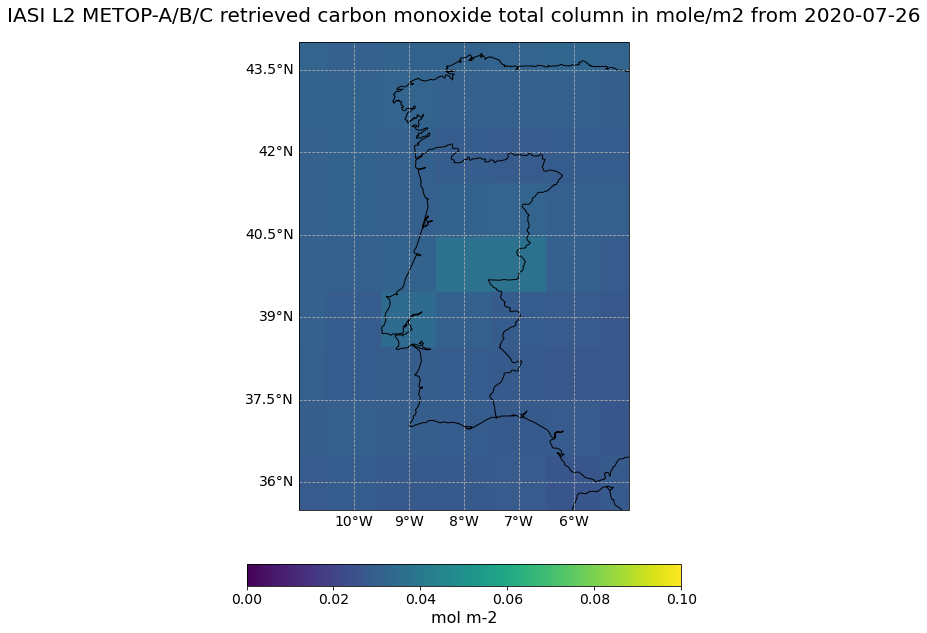

In [68]:
latmin = 35.5
latmax = 44.
lonmin = -11.
lonmax = -5

visualize_pcolormesh(data_array=xarray_abc, 
                     longitude=xarray_abc.longitude, 
                     latitude=xarray_abc.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='viridis', 
                     unit=xarray_abc.units, 
                     long_name="IASI L2 METOP-A/B/C " + xarray_abc.long_name + " from " + str(xarray_abc.time.data)[0:10],
                     vmin=0, 
                     vmax=0.1,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

^ [Return to the top](#top)

<br>

## <a id="sentinel_5p_co"></a> Sentinel-5P TROPOMI - Carbon Monoxide (CO) - Level 2

Sentinel-5P carries the `TROPOMI` instrument, which is a spectrometer in the UV-VIS-NIR-SWIR spectral range. `TROPOMI` provides measurements on:
* `Ozone`
* `NO`<sub>`2`</sub>
* `SO`<sub>`2`</sub>
* `Formaldehyde`
* `Aerosol`
* `Carbon monoxide`
* `Methane`
* `Clouds`

This section introduces the Sentinel-5P TROPOMI Carbon monoxide data and how it can be used to monitor wildfires.

#### Load a Sentinel-5P TROPOMI data file as `xarray.Dataset` with the `open_dataset()` function from `xarray`.

In [35]:
file = xr.open_dataset('../eodata/sentinel5p/co/2020/07/27/S5P_OFFL_L2__CO_____20200727T125510_20200727T143639_14445_01_010302_20200802T045214.nc', group='PRODUCT')
file

<xarray.Dataset>
Dimensions:                                (corner: 4, ground_pixel: 215, layer: 50, scanline: 4173, time: 1)
Coordinates:
  * scanline                               (scanline) float64 0.0 ... 4.172e+03
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * time                                   (time) datetime64[ns] 2020-07-27
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * layer                                  (layer) float32 4.95e+04 ... 500.0
    latitude                               (time, scanline, ground_pixel) float32 ...
    longitude                              (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                             (time, scanline) datetime64[ns] ...
    time_utc                               (time, scanline) object ...
    qa_value                               (time, scanline, ground_pixel) float32 ...
    carbonmonoxide_total_column            (time, scanline, ground_pixel) float32 ...
    carbonmonoxide_total_column_precision  (time, scanline, ground_pixel) float32 ...

<br>

### <a id='data_retrieve_s5p'></a>Retrieve the variable `carbonmonoxide_total_column` as xarray.DataArray

Load the variable of interest `carbonmonoxide_total_column`.

In [36]:
co = file['carbonmonoxide_total_column']
co

<xarray.DataArray 'carbonmonoxide_total_column' (time: 1, scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2020-07-27
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

Repeat the previous step for the dimensions `latitude` and `longitude`.

In [37]:
latitude = co['latitude']
longitude = co['longitude']

Select the first time step by specifying the first value of the `time` dimension, i.e. `[0,:,:]`.

In [38]:
co_2707 = co[0,:,:]
co_2707

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2020-07-27
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

The attributes of the `xarray.DataArray` hold the entry `multiplication_factor_to_convert_to_molecules_percm2`.

In [39]:
conversion_factor = co_2707.multiplication_factor_to_convert_to_molecules_percm2
conversion_factor

6.022141e+19

Apply the conversion factor to the `xarray.DataArray` to convert the Carbon Monoxide values from *mol per m<sup>2</sup>* to *molecules per cm<sup>2</sup>*.

In [40]:
co_2707_converted =  co_2707*conversion_factor
co_2707_converted

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 4173, ground_pixel: 215)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2020-07-27
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...

## <a id="plotting_s5p"></a>Plotting example - Sentinel-5P data

Specify a `bounding box` set to the extent of Portugal. Visualize the gridded data with plotting function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Vertically integrated CO column 2020-07-27T00:00:00.000000000'}>)

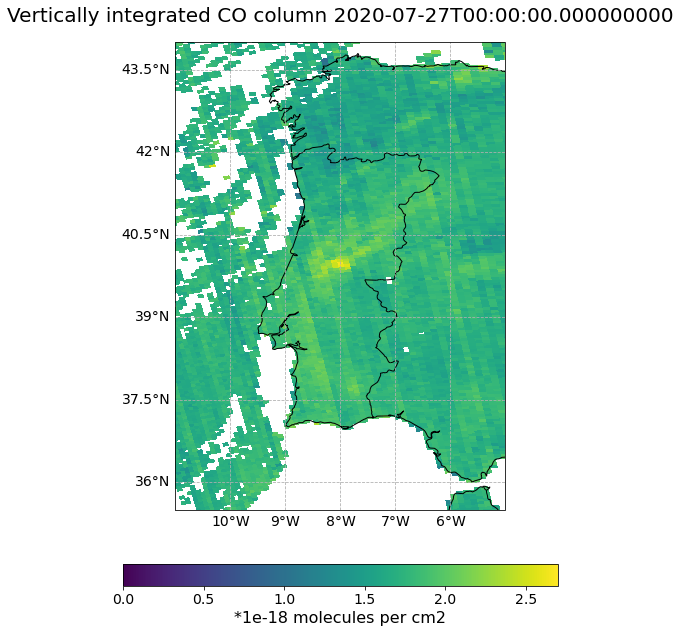

In [41]:
latmin = 35.5
latmax = 44.
lonmin = -11.
lonmax = -5

visualize_pcolormesh(data_array=co_2707_converted*1e-18,
                     longitude=co_2707_converted.longitude,
                     latitude=co_2707_converted.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='viridis',
                     unit='*1e-18 molecules per cm2',
                     long_name=co_2707.long_name + ' ' + str(co_2707_converted.time.data),
                     vmin=0, 
                     vmax=2.7,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

^ [Return to the top](#top)

<br>

## <a id="sentinel_5p_uvai"></a> Sentinel-5P TROPOMI - Ultraviolet Aerosol Index (UVAI) - Level 2

For fire monitoring , the `TROPOMI UV Aerosol Index (UVAI)` data can be used. 

Positive values of UVAI (typically > abt. 1.0) indicate the presence of absorbing-type aerosols: 
- `smoke from forest fires`, 
- `volcanic ash`, or 
- `desert dust`. 



#### Load a Sentinel-5P TROPOMI data file as `xarray.Dataset` with the `open_dataset()` function from `xarray`.

In [43]:
s5p_mf = xr.open_dataset('../eodata/sentinel5p/UVAI/2020/07/26/S5P_OFFL_L2__AER_AI_20200726T131416_20200726T145545_14431_01_010302_20200801T070858.nc', group='PRODUCT')
s5p_mf

<xarray.Dataset>
Dimensions:                          (corner: 4, ground_pixel: 450, scanline: 4173, time: 1)
Coordinates:
  * scanline                         (scanline) float64 0.0 1.0 ... 4.172e+03
  * ground_pixel                     (ground_pixel) float64 0.0 1.0 ... 449.0
  * time                             (time) datetime64[ns] 2020-07-26
  * corner                           (corner) float64 0.0 1.0 2.0 3.0
    latitude                         (time, scanline, ground_pixel) float32 ...
    longitude                        (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                       (time, scanline) datetime64[ns] ...
    time_utc                         (time, scanline) object ...
    qa_value                         (time, scanline, ground_pixel) float32 ...
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 ...
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 ...
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 ...
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 ...

### Select an `aerosol index` variable

The Sentinel-5p TROPOMI aerosol index data provide the Aerosol Index for two different wavelength pairs: 
- `340_380 nm`
- `354_388 nm` 

Select the data variable `aerosol_index_340_380` together with the geo-coordinates as follows:

In [44]:
uvai = s5p_mf.aerosol_index_340_380[0,:,:]
lat = uvai.latitude
lon = uvai.longitude


### Read the `Quality Flag` to mask the UVAI data

Another important parameter to read is the general quality flag called `qa_value`. The quality flag removes the sun glint pixels, where "falsely" high positive UVAI values over sea can be detected. In order to exclude sun glint, it is recommended to use only values where the `qa_value` is higher than 0.8. 

In [45]:
qa=s5p_mf.qa_value[0,:,:]

### Apply the qa value and mask the data

The final step before plotting is to mask the aerosol index data based on the qa mask. You filter data with the `xarray` function `where`.

In [46]:
uvai_masked=uvai.where(qa > 0.8)

### Visualize the `UV Aerosol Index` value

Specify a `bounding box` set to the extent of Portugal. Visualize the gridded data with plotting function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Aerosol index from 380 and 340 nm'}>)

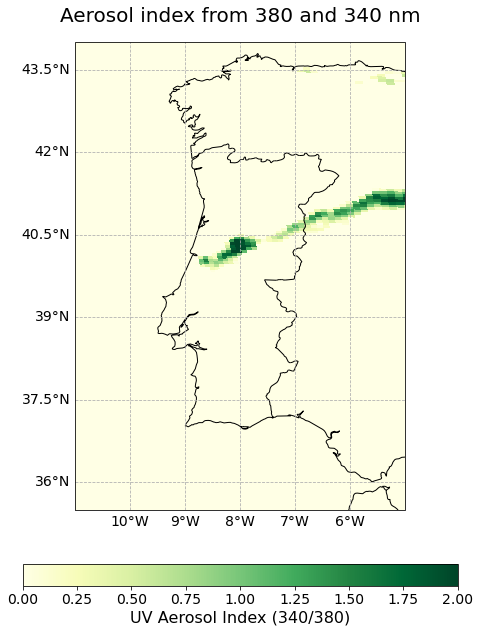

In [47]:
latmin = 35.5
latmax = 44.
lonmin = -11.
lonmax = -5

visualize_pcolormesh(data_array=uvai_masked,
                     longitude=lon,
                     latitude=lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit= 'UV Aerosol Index (340/380)',
                     long_name=uvai.long_name,
                     vmin=0, 
                     vmax=2,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<br>

## You have arrived at the end of this workflow highlighting the Portugal fires of July 2020.

<img src='../img/portugalfires_2_DW.jpg' alt='Portugal Fires, source: https://www.dw.com/en/portugal-wildfires-state-of-alert/a-54329910#' align='centre' width='60%'></img>

<i>Caption: A firefighter tries to extinguish a wildfire in Vale da Cuba.</i> Image from [DW.com](https://www.dw.com/en/portugal-wildfires-state-of-alert/a-54329910).

^ [Return to the top](#top)

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./318_fire_indonesia_2020.ipynb"><< 318 Indonesian Fires 2020 - Multi-data</a><span style="float:right;"><a href="./321_air_pollution_map_time-series_Metop-AB_GOME-2_NO2Tropo_L3.ipynb">321 - Map and time-series of Metop-A/B GOME-2 Tropospheric NO<sub>2</sub> Level 3 >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>